# Clone detection

## Table of Contents:
1. [Clone detection workflow and results](#check)
2. [Implementation](#implementation)

## 1. Clone detection workflow and results <a class="anchor" id="check"></a>

In the following function call, the script [implemented](#implementation) at the end of this file will run the entire clone detection workflow, including:

1. Export snippets from database to java files
2. Run CCFinder with specified options on those java files
3. Parse the CCFinder result file (.ccfxd) into database
4. Update the database with more information (eg. line number) from proprocessed files generated by CCFinder


As the first step, we run the entire clone detection process on the first 5,000 snipeets of the in total 25,855 extracted snippets.

In [32]:
snippet_dname = '5k'
snippet_id_range = (0,5000)
ccf_opt = ''
detect_clones(snippet_dname, ccf_opt, snippet_id_range, connect_str=connect_str)

4918 snippets exported to /home/mschen/code/nbooks/5k
cd ~/code/ccfinderx-core/ccfx && ccfx d java  -dn /home/mschen/code/nbooks/5k -o /home/mschen/code/nbooks/5k.ccfxd && ccfx p /home/mschen/code/nbooks/5k.ccfxd > /home/mschen/code/nbooks/5k.txt
...Done
Done: /home/mschen/code/nbooks/5k.txt written to source_files_5k and clone_pairs_5k


We are then able to exam a lot of things by issuing query on the database. For example, in the following, we want to check each clones in a clone group. In this "5k" case, there are 356 clone groups. Below, we print out all elements in each clone group for some of the clone groups. A clone group is identified by clone id (cid).

Next, we will compute precision, recall, etc. by manually examing the following result. And then run the entire process on all the snippets.

By the way, scanning throught the following output, I did find the "overlap" case you mentioned (eg. for cid=1294)

In [9]:
for cid in [917, 1489, 1294, 2867, 608, 576]:
    specific_group_check(cid=cid, tb_name_suffix='5k', connect_str=connect_str)

========Clone group cid: 917, containing 19 clone elements=========
----0/19----
http://stackoverflow.com/questions/5429906    Ln 57-62



```java
            in = new BufferedReader(new InputStreamReader(response.getEntity().getContent()));

            StringBuffer sb = new StringBuffer("");
            String line = "";
            String NL = System.getProperty("line.separator");
```


----1/19----
http://stackoverflow.com/questions/5429906    Ln 94-99



```java
            in = new BufferedReader(new InputStreamReader(response.getEntity().getContent()));

            StringBuffer sb = new StringBuffer("");
            String line = "";
            String NL = System.getProperty("line.separator");
```


----2/19----
http://stackoverflow.com/questions/6106670    Ln 2-7



```java
           in = new BufferedReader(new InputStreamReader(response.getEntity().getContent()));
           StringBuffer sb = new StringBuffer("");
           String line = "";
           String NL = System.getProperty("line.separator");
           while ((line = in.readLine()) != null)
```


----3/19----
http://stackoverflow.com/questions/10292516    Ln 41-45



```java
        in = new BufferedReader(new InputStreamReader(response.getEntity().getContent()));
        StringBuffer sb = new StringBuffer("");
        String l = "";
        String nl = System.getProperty("line.separator");
```


----4/19----
http://stackoverflow.com/questions/10446909    Ln 6-11



```java
in = new BufferedReader
(new InputStreamReader(response.getEntity().getContent()));
StringBuffer sb = new StringBuffer("");
String line = "";
String NL = System.getProperty("line.separator");
```


----5/19----
http://stackoverflow.com/questions/10684332    Ln 2-9



```java
 BufferedReader in = new BufferedReader(new InputStreamReader(response
                        .getEntity().getContent()));

                //SB to make a string out of the inputstream
                StringBuffer sb = new StringBuffer("");
                String line = "";
                String NL = System.getProperty("line.separator");
```


----6/19----
http://stackoverflow.com/questions/10819181    Ln 10-17



```java
        in = new BufferedReader(new InputStreamReader(response.getEntity().getContent()));

        StringBuffer sb = new StringBuffer("");
        String line = "";

        String NL = System.getProperty("line.separator");
        while ((line = in.readLine()) != null)
```


----7/19----
http://stackoverflow.com/questions/20158852    Ln 15-19



```java
                BufferedReader in = new BufferedReader(new InputStreamReader(response.getEntity().getContent()));
                StringBuffer sb = new StringBuffer("");
                String line = "";
                String NL = System.getProperty("line.separator");
```


----8/19----
http://stackoverflow.com/questions/22319528    Ln 57-62



```java
        in = new BufferedReader(new InputStreamReader(response.getEntity().getContent()));

        StringBuffer sb = new StringBuffer("");
        String line = "";
        String NL = System.getProperty("line.separator");
```


----9/19----
http://stackoverflow.com/questions/22319528    Ln 94-99



```java
        in = new BufferedReader(new InputStreamReader(response.getEntity().getContent()));

        StringBuffer sb = new StringBuffer("");
        String line = "";
        String NL = System.getProperty("line.separator");
```


----10/19----
http://stackoverflow.com/questions/36153807    Ln 104-109



```java
            in = new BufferedReader(new InputStreamReader(response.getEntity().getContent()));

            StringBuffer sb = new StringBuffer("");
            String line = "";
            String NL = System.getProperty("line.separator");
```


----11/19----
http://stackoverflow.com/questions/36153807    Ln 142-147



```java
            in = new BufferedReader(new InputStreamReader(response.getEntity().getContent()));

            StringBuffer sb = new StringBuffer("");
            String line = "";
            String NL = System.getProperty("line.separator");
```


----12/19----
http://stackoverflow.com/questions/38237615    Ln 48-53



```java
        in = new BufferedReader(new InputStreamReader(response.getEntity().getContent()));

        StringBuffer sb = new StringBuffer("");
        String line = "";
        String NL = System.getProperty("line.separator");
```


----13/19----
http://stackoverflow.com/questions/38237615    Ln 81-86



```java
        in = new BufferedReader(new InputStreamReader(response.getEntity().getContent()));

        StringBuffer sb = new StringBuffer("");
        String line = "";
        String NL = System.getProperty("line.separator");
```


----14/19----
http://stackoverflow.com/questions/38237615    Ln 119-124



```java
        in = new BufferedReader(new InputStreamReader(response.getEntity().getContent()));

        StringBuffer sb = new StringBuffer("");
        String line = "";
        String NL = System.getProperty("line.separator");
```


----15/19----
http://stackoverflow.com/questions/38391214    Ln 48-53



```java
        in = new BufferedReader(new InputStreamReader(response.getEntity().getContent()));

        StringBuffer sb = new StringBuffer("");
        String line = "";
        String NL = System.getProperty("line.separator");
```


----16/19----
http://stackoverflow.com/questions/38391214    Ln 81-86



```java
        in = new BufferedReader(new InputStreamReader(response.getEntity().getContent()));

        StringBuffer sb = new StringBuffer("");
        String line = "";
        String NL = System.getProperty("line.separator");
```


----17/19----
http://stackoverflow.com/questions/38391214    Ln 119-124



```java
        in = new BufferedReader(new InputStreamReader(response.getEntity().getContent()));

        StringBuffer sb = new StringBuffer("");
        String line = "";
        String NL = System.getProperty("line.separator");
```


----18/19----
http://stackoverflow.com/questions/38512898    Ln 10-15



```java
                        in = new BufferedReader
                        (new InputStreamReader(response.getEntity().getContent()));
                        StringBuffer sb = new StringBuffer("");
                        String line = "";
                        String NL = System.getProperty("line.separator");
```


========Clone group cid: 1489, containing 15 clone elements=========
----0/15----
http://stackoverflow.com/questions/14957365    Ln 6-11



```java
        for (Signature signature : info.signatures) {
            MessageDigest md = MessageDigest.getInstance("SHA");
            md.update(signature.toByteArray());
            Log.d("Your Tag", Base64.encodeToString(md.digest(), Base64.DEFAULT));
            }
```


----1/15----
http://stackoverflow.com/questions/20097247    Ln 5-10



```java
            for (Signature signature : info.signatures) {
                MessageDigest md = MessageDigest.getInstance("SHA");
                md.update(signature.toByteArray());
                Log.v("KeyHash:", Base64.encodeToString(md.digest(), Base64.DEFAULT));
                }
```


----2/15----
http://stackoverflow.com/questions/20188768    Ln 6-12



```java
        for (Signature signature : info.signatures) {
            MessageDigest md = MessageDigest.getInstance("SHA");
            md.update(signature.toByteArray());
            Log.d("KeyHash:",
                    Base64.encodeToString(md.digest(), Base64.DEFAULT));
        }
```


----3/15----
http://stackoverflow.com/questions/20325704    Ln 4-9



```java
            for (Signature signature : info.signatures) {
                MessageDigest md = MessageDigest.getInstance("SHA");
                md.update(signature.toByteArray());
                Log.d("KeyHash:", Base64.encodeToString(md.digest(), Base64.DEFAULT));
                }
```


----4/15----
http://stackoverflow.com/questions/20613068    Ln 6-11



```java
        for (Signature signature : info.signatures) {
            MessageDigest md = MessageDigest.getInstance("SHA");
            md.update(signature.toByteArray());
            Log.d("KeyHash:", Base64.encodeToString(md.digest(), Base64.DEFAULT));
            }
```


----5/15----
http://stackoverflow.com/questions/22587756    Ln 6-13



```java
   for (Signature signature : info.signatures) 
   {
    MessageDigest md = MessageDigest.getInstance("SHA");
    md.update(signature.toByteArray());
    Log.d("KeyHash:", Base64.encodeToString(md.digest(), Base64.DEFAULT));
   }

```


----6/15----
http://stackoverflow.com/questions/24973818    Ln 5-11



```java
    for (Signature signature : info.signatures) {
        MessageDigest md = MessageDigest.getInstance("SHA");
        md.update(signature.toByteArray());
        Log.e("MY_KEY_HASH:",
                Base64.encodeToString(md.digest(), Base64.DEFAULT));
    }
```


----7/15----
http://stackoverflow.com/questions/25262681    Ln 5-10



```java
for (Signature signature : info.signatures){
       MessageDigest md = MessageDigest.getInstance("SHA");
       md.update(signature.toByteArray());
       Log.d("KeyHash:", Base64.encodeToString(md.digest(), Base64.DEFAULT));
}
```


----8/15----
http://stackoverflow.com/questions/25263204    Ln 5-10



```java
for (Signature signature : info.signatures){
       MessageDigest md = MessageDigest.getInstance("SHA");
       md.update(signature.toByteArray());
       Log.d("KeyHash:", Base64.encodeToString(md.digest(), Base64.DEFAULT));
}
```


----9/15----
http://stackoverflow.com/questions/33890446    Ln 8-13



```java
        for (Signature signature : info.signatures) {
            MessageDigest md = MessageDigest.getInstance("SHA");
            md.update(signature.toByteArray());
            Log.d("KeyHash:", Base64.encodeToString(md.digest(), Base64.DEFAULT));
        }
```


----10/15----
http://stackoverflow.com/questions/36149674    Ln 59-64



```java
                for (Signature signature : info.signatures) {
                    MessageDigest md = MessageDigest.getInstance("SHA");
                    md.update(signature.toByteArray());
                    Log.d("KeyHash:", Base64.encodeToString(md.digest(), Base64.DEFAULT));
                    }
```


----11/15----
http://stackoverflow.com/questions/37154788    Ln 6-12



```java
        for (Signature signature : info.signatures) {
            MessageDigest md = MessageDigest.getInstance("SHA");
            md.update(signature.toByteArray());

             Log.d("KeyHash:", Base64.encodeToString(md.digest(), Base64.DEFAULT));
        }
```


----12/15----
http://stackoverflow.com/questions/38011353    Ln 19-24



```java
        for (Signature signature : info.signatures) {
            MessageDigest md = MessageDigest.getInstance("SHA");
            md.update(signature.toByteArray());
            Log.i("KeyHash:", Base64.encodeToString(md.digest(), Base64.DEFAULT));
        }
```


----13/15----
http://stackoverflow.com/questions/39139257    Ln 6-11



```java
    for (Signature signature : info.signatures) {
        MessageDigest md = MessageDigest.getInstance("SHA");
        md.update(signature.toByteArray());
        Log.d("KeyHash:", Base64.encodeToString(md.digest(), Base64.DEFAULT));
    }
```


----14/15----
http://stackoverflow.com/questions/39265878    Ln 6-11



```java
        for (android.content.pm.Signature signature : info.signatures) {
            MessageDigest md = MessageDigest.getInstance("SHA");
            md.update(signature.toByteArray());
            Log.d("KeyHash:", Base64.encodeToString(md.digest(), Base64.DEFAULT));
        }
```


========Clone group cid: 1294, containing 11 clone elements=========
----0/11----
http://stackoverflow.com/questions/6672633    Ln 300-307



```java
        } catch (IOException ex) {
            Logger.getLogger(HostnameValidator.class.getName()).log(Level.SEVERE, null, ex);
        } catch (ParserConfigurationException ex) {
            Logger.getLogger(HostnameValidator.class.getName()).log(Level.SEVERE, null, ex);
        }

        // prepare XPath
```


----1/11----
http://stackoverflow.com/questions/6672633    Ln 298-302



```java
        } catch (SAXException ex) {
            Logger.getLogger(HostnameValidator.class.getName()).log(Level.SEVERE, null, ex);
        } catch (IOException ex) {
            Logger.getLogger(HostnameValidator.class.getName()).log(Level.SEVERE, null, ex);
```


----2/11----
http://stackoverflow.com/questions/14718710    Ln 31-36



```java
        } catch (IOException ex) {
            Logger.getLogger(ApacheHttpRestClient.class.getName()).log(Level.SEVERE, null, ex);
        } catch (CertificateException ex) {
            Logger.getLogger(ApacheHttpRestClient.class.getName()).log(Level.SEVERE, null, ex);
        }
```


----3/11----
http://stackoverflow.com/questions/14718710    Ln 54-60



```java
        } catch (KeyManagementException ex) {
            Logger.getLogger(ApacheHttpRestClient.class.getName()).log(Level.SEVERE, null, ex);
        } catch (UnrecoverableKeyException ex) {
            Logger.getLogger(ApacheHttpRestClient.class.getName()).log(Level.SEVERE, null, ex);
        }

```


----4/11----
http://stackoverflow.com/questions/14718710    Ln 60-66



```java
    } catch (NoSuchAlgorithmException ex) {
        Logger.getLogger(ApacheHttpRestClient.class.getName()).log(Level.SEVERE, null, ex);
    } catch (KeyStoreException ex) {
        Logger.getLogger(ApacheHttpRestClient.class.getName()).log(Level.SEVERE, null, ex);
    }
    // use the httpclient for any httpRequest
```


----5/11----
http://stackoverflow.com/questions/21797670    Ln 62-67



```java
        } catch (NoSuchAlgorithmException ex) {
            Logger.getLogger(ConnectionFactory.class.getName()).log(Level.SEVERE, null, ex);
        } catch (KeyManagementException ex) {
            Logger.getLogger(ConnectionFactory.class.getName()).log(Level.SEVERE, null, ex);
        }
```


----6/11----
http://stackoverflow.com/questions/21797729    Ln 62-67



```java
        } catch (NoSuchAlgorithmException ex) {
            Logger.getLogger(ConnectionFactory.class.getName()).log(Level.SEVERE, null, ex);
        } catch (KeyManagementException ex) {
            Logger.getLogger(ConnectionFactory.class.getName()).log(Level.SEVERE, null, ex);
        }
```


----7/11----
http://stackoverflow.com/questions/30610023    Ln 172-176



```java
        } catch (InvalidKeyException ex) {
            Logger.getLogger(AES.class.getName()).log(Level.SEVERE, null, ex);
        } catch (InvalidParameterSpecException ex) {
            Logger.getLogger(AES.class.getName()).log(Level.SEVERE, null, ex);
```


----8/11----
http://stackoverflow.com/questions/30610023    Ln 174-178



```java
        } catch (InvalidParameterSpecException ex) {
            Logger.getLogger(AES.class.getName()).log(Level.SEVERE, null, ex);
        } catch (NoSuchAlgorithmException ex) {
            Logger.getLogger(AES.class.getName()).log(Level.SEVERE, null, ex);
```


----9/11----
http://stackoverflow.com/questions/30610023    Ln 176-180



```java
        } catch (NoSuchAlgorithmException ex) {
            Logger.getLogger(AES.class.getName()).log(Level.SEVERE, null, ex);
        } catch (NoSuchPaddingException ex) {
            Logger.getLogger(AES.class.getName()).log(Level.SEVERE, null, ex);
```


----10/11----
http://stackoverflow.com/questions/30610023    Ln 178-183



```java
        } catch (NoSuchPaddingException ex) {
            Logger.getLogger(AES.class.getName()).log(Level.SEVERE, null, ex);
        } catch (InvalidKeySpecException ex) {
            Logger.getLogger(AES.class.getName()).log(Level.SEVERE, null, ex);
        }
```


========Clone group cid: 2867, containing 7 clone elements=========
----0/7----
http://stackoverflow.com/questions/14098236    Ln 12-16



```java
    StringBuffer sb = new StringBuffer();
    for (int i = 0; i < mdbytes.length; i++) {
        sb.append(Integer.toString((mdbytes[i] & 0xff) + 0x100, 16).substring(1));
    }
```


----1/7----
http://stackoverflow.com/questions/15216515    Ln 10-14



```java
        StringBuffer sb = new StringBuffer();
        for (int i = 0; i < byteData.length; i++) {
         sb.append(Integer.toString((byteData[i] & 0xff) + 0x100, 16).substring(1));
        }
```


----2/7----
http://stackoverflow.com/questions/15669908    Ln 33-38



```java
        StringBuffer hexBuffer = new StringBuffer();
        for (int i = 0; i < bytes.length; i++) {
            hexBuffer.append(Integer.toString((bytes[i] & 0xFF) + 0x100, 16).substring(1));
        }

```


----3/7----
http://stackoverflow.com/questions/15669908    Ln 13-18



```java
        StringBuffer sb = new StringBuffer();
        for (int i = 0; i < byteData.length; i++) {
            sb.append(Integer.toString((byteData[i] & 0xFF) + 0x100, 16).substring(1));
        }

```


----4/7----
http://stackoverflow.com/questions/20531475    Ln 5-10



```java
    StringBuilder sb = new StringBuilder();
    for (int i = 0; i < digest.length; i++) {
        sb.append(Integer.toString((digest[i] & 0xff) + 0x100, 16).substring(1));
    }

```


----5/7----
http://stackoverflow.com/questions/22341166    Ln 25-30



```java
    StringBuilder sb = new StringBuilder();
    for (int i = 0; i < byteData.length; i++) {
        sb.append(Integer.toString((byteData[i] & 0xff) + 0x100, 16).substring(1));
    }

```


----6/7----
http://stackoverflow.com/questions/44436308    Ln 6-11



```java
        byte byteData[] = md.digest();

        for (int i = 0; i < byteData.length; i++) {
         sb.append(Integer.toString((byteData[i] & 0xff) + 0x100, 16).substring(1));
        }
```


========Clone group cid: 608, containing 5 clone elements=========
----0/5----
http://stackoverflow.com/questions/10725268    Ln 61-85



```java
public static HttpClient getNewHttpClient() {
    try {
       KeyStore trustStore = KeyStore.getInstance(KeyStore.getDefaultType());
       trustStore.load(null, null);

       SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
       sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

       HttpParams params = new BasicHttpParams();
       HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
       HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

       SchemeRegistry registry = new SchemeRegistry();
       registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
       registry.register(new Scheme("https", sf, 443));

       ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

       return new DefaultHttpClient(ccm, params);
    } catch (Exception e) {
       return new DefaultHttpClient();
    }
}

```


----1/5----
http://stackoverflow.com/questions/15157327    Ln 29-56



```java
public HttpClient getNewHttpClient() {
        try {
            KeyStore trustStore = KeyStore.getInstance(KeyStore
                    .getDefaultType());
            trustStore.load(null, null);

            SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
            sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

            HttpParams params = new BasicHttpParams();
            HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
            HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

            SchemeRegistry registry = new SchemeRegistry();
            registry.register(new Scheme("http", PlainSocketFactory
                    .getSocketFactory(), 80));
            registry.register(new Scheme("https", sf, 443));

            ClientConnectionManager ccm = new ThreadSafeClientConnManager(
                    params, registry);

            return new DefaultHttpClient(ccm, params);
        } catch (Exception e) {
            return new DefaultHttpClient();
        }
    }

```


----2/5----
http://stackoverflow.com/questions/18371429    Ln 1-28



```java
public HttpClient getNewHttpClient() {
        try {
            KeyStore trustStore = KeyStore.getInstance(KeyStore
                    .getDefaultType());
            trustStore.load(null, null);

            SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
            sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

            HttpParams params = new BasicHttpParams();
            HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
            HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

            SchemeRegistry registry = new SchemeRegistry();
            registry.register(new Scheme("http", PlainSocketFactory
                    .getSocketFactory(), 80));
            registry.register(new Scheme("https", sf, 443));

            ClientConnectionManager ccm = new ThreadSafeClientConnManager(
                    params, registry);

            return new DefaultHttpClient(ccm, params);
        } catch (Exception e) {
            return new DefaultHttpClient();
        }
    }

```


----3/5----
http://stackoverflow.com/questions/24013606    Ln 1-25



```java
public HttpClient getNewHttpClient() {
     try {
         KeyStore trustStore = KeyStore.getInstance(KeyStore.getDefaultType());
         trustStore.load(null, null);

         SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
         sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

         HttpParams params = new BasicHttpParams();
         HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
         HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

         SchemeRegistry registry = new SchemeRegistry();
         registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
         registry.register(new Scheme("https", sf, 443));

         ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

         return new DefaultHttpClient(ccm, params);
     } catch (Exception e) {
         return new DefaultHttpClient();
     }
}

```


----4/5----
http://stackoverflow.com/questions/25418908    Ln 1-25



```java
public static  HttpClient getNewHttpClient() {
    try {
        KeyStore trustStore = KeyStore.getInstance(KeyStore.getDefaultType());
        trustStore.load(null, null);

        SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

        return new DefaultHttpClient(ccm, params);
    } catch (Exception e) {
        return new DefaultHttpClient();
    }
}

```


========Clone group cid: 576, containing 4 clone elements=========
----0/4----
http://stackoverflow.com/questions/20135455    Ln 8-16



```java
BufferedReader rd = new BufferedReader(
    new InputStreamReader(response.getEntity().getContent()));

StringBuffer result = new StringBuffer();
String line = "";
while ((line = rd.readLine()) != null) {
    result.append(line);
}
```


----1/4----
http://stackoverflow.com/questions/20376055    Ln 17-25



```java
BufferedReader rd = new BufferedReader(new InputStreamReader(response.getEntity().getContent()));

StringBuffer result = new StringBuffer();
String line = "";
while ((line = rd.readLine()) != null) {
    result.append(line);
}

```


----2/4----
http://stackoverflow.com/questions/39462422    Ln 30-37



```java
        BufferedReader rd = new BufferedReader(new InputStreamReader(response.getEntity().getContent()));

        StringBuffer result = new StringBuffer();
        String line = "";
        while ((line = rd.readLine()) != null) {
            result.append(line);
        }
```


----3/4----
http://stackoverflow.com/questions/39482672    Ln 41-48



```java
        BufferedReader rd = new BufferedReader(new InputStreamReader(response.getEntity().getContent()));

        StringBuffer result = new StringBuffer();
        String line = "";
        while ((line = rd.readLine()) != null) {
            result.append(line);
        }
```


In [ ]:
tb_name_suffix = '5k'
with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        sql_create = 'CREATE TABLE %s();'

## Implementation <a class="anchor" id="implementation"></a>

In [5]:
from IPython.display import Markdown, display
import psycopg2
import numpy as np
import pandas as pd
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import os

In [6]:
connect_str = "dbname='stackoverflow' user='extractor' host='localhost' " + \
              "password='extractor'"

In [7]:
def codeprint(code):
    display(Markdown("""
```java
%s
```
""" % (code)))
    
def export_as_java(start_id, end_id, snippet_dpath):
    '''export from database to java files for id within range [start_id, end_id)'''
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        cursor.execute("""SELECT postid, indx, code FROM snippets WHERE id >= %d AND id < %d;""" % (start_id, end_id))
        rows = cursor.fetchall()
        for row in rows:
            fname = '%d_%d.java' % (row[0], row[1])
            if not os.path.isdir(snippet_dpath):
                os.makedirs(snippet_dpath)
            fpath = os.path.join(snippet_dpath,fname)
            with open(fpath, 'w') as f:
                f.write(row[-1])
        print(len(rows), "snippets exported to", snippet_dpath)

### process .ccfxd file

In [17]:
def get_prepro_suffix(ccfxd_txt_fpath):
    with open(ccfxd_txt_fpath) as f:
        for line in f:
            if "option: -preprocessed_file_postfix" in line:
                return line.split()[-1]

def sql_4ccfxd_file_block(line, tb_name, fid_postid):
    '''prepare SQL for ccfxd file block'''
    file_info = line.split()
    fid = file_info[0]
    fname = "".join(file_info[1].split('/')[-1].split('.')[:-1])
    postid, indx = fname.split('_')
    fid_postid[fid] = (postid, indx) 
    length = file_info[2]
    sql = """INSERT INTO %s(fid, postid, indx, length)
VALUES(%s, %s, %s, %s) ON CONFLICT DO NOTHING;""" % (tb_name,
    fid, postid, indx, length)
    return sql

def sql_4ccfxd_pair_block(line, tb_name, fid_postid):
    '''prepare SQL for ccfxd clone pair block'''
    clone_pair = line.split()
    pid = ":".join(clone_pair[1:])  # unique pair id
    cid = clone_pair[0]
    clone0 = clone_pair[1].split(".")
    fid0 = clone0[0]
    tmp = clone0[1].split("-")
    tbegin0 = tmp[0]
    tend0 = tmp[1]
    clone1 = clone_pair[2].split(".")
    fid1 = clone1[0]
    tmp = clone1[1].split("-")
    tbegin1 = tmp[0]
    tend1 = tmp[1]
    sql = """INSERT INTO %s(pid, cid,
postid0, indx0, tbegin0, tend0,
postid1, indx1, tbegin1, tend1
) VALUES ($aesc6$%s$aesc6$, %s,
%s, %s, %s, %s,
%s, %s, %s, %s) ON CONFLICT DO NOTHING;""" % (tb_name, pid, cid,
    fid_postid[fid0][0], fid_postid[fid0][1], tbegin0, tend0,
    fid_postid[fid1][0], fid_postid[fid1][1], tbegin1, tend1)
    return sql

def ccfxd2db(ccfxd_txt_fpath, connect_str):
    '''dump .ccfxd file to postgresql database'''
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        tb_name_suffix = "".join(os.path.basename(ccfxd_txt_fpath).split(".")[:-1])
        file_tb_name = "source_files_%s" % (tb_name_suffix)
        pair_tb_name = "clone_pairs_%s" % (tb_name_suffix)
        sql_create = """CREATE TABLE IF NOT EXISTS %s(
fid INT,
postid INT,
indx INT,
length INT,
PRIMARY KEY (fid),
FOREIGN KEY (postid, indx) REFERENCES snippets(postid, indx)
);
""" % (file_tb_name)
        cursor.execute(sql_create)
        
        sql_create = """CREATE TABLE IF NOT EXISTS %s(
pid VARCHAR(64), 
cid INT,
postid0 INT,
indx0 INT,
tbegin0 INT,
tend0 INT,
lbegin0 INT,
lend0 INT,
code0 VARCHAR(24060),
postid1 INT,
indx1 INT,
tbegin1 INT,
tend1 INT,
lbegin1 INT,
lend1 INT,
code1 VARCHAR(24060),
PRIMARY KEY (pid)
); 
""" % (pair_tb_name)
        cursor.execute(sql_create)        
        
        fid_postid = {}
        with open(ccfxd_txt_fpath) as f:
            parsing_fid = False
            parsing_cid = False
            for line in f:
                if line == 'source_files {\n':
                    parsing_fid = True
                    continue
                if parsing_fid:
                    if line == '}\n':
                        parsing_fid = False
                        continue
                    sql = sql_4ccfxd_file_block(line, file_tb_name, fid_postid)
                    cursor.execute(sql)

                if line == 'clone_pairs {\n':
                    parsing_cid = True
                    continue
                if parsing_cid:
                    if line == '}\n':
                        parsing_cid = False
                        continue
                    sql = sql_4ccfxd_pair_block(line, pair_tb_name, fid_postid)
                    cursor.execute(sql)
    print("Done:", ccfxd_txt_fpath,"written to", file_tb_name, "and", pair_tb_name)


########## process intermediate file

def itoken2iline(itokens, prepro_fpath):
    '''convert token index to line index, both are 0 based'''
    ilines = []
    with open(prepro_fpath) as f:
        for i, line in enumerate(f):
            if i in itokens:
                iline = int(line.split('.')[0],16)-1
                ilines.append(iline)
    return itokens.__class__(ilines)



def update_clone_pair_db(snippet_dpath, connect_str,
                         prepro_suffix='.java.2_0_0_0.default.ccfxprep',
                         prepro_dname = '.ccfxprepdir/'):
    with psycopg2.connect(connect_str) as conn:
        tb_name_suffix = os.path.basename(snippet_dpath)
        file_tb_name = "source_files_%s" % (tb_name_suffix)
        pair_tb_name = "clone_pairs_%s" % (tb_name_suffix)
        cursor = conn.cursor()
    #   1       2        3         4           5
        sql = """SELECT p.pid,
p.postid0, p.indx0, s0.code, p.tbegin0, p.tend0,
p.postid1, p.indx1, s1.code, p.tbegin1, p.tend1
FROM %s p
INNER JOIN snippets s0
  ON p.postid0 = s0.postid AND p.indx0 = s0.indx
INNER JOIN snippets s1
  ON p.postid1 = s1.postid AND p.indx1 = s1.indx
;""" % (pair_tb_name)
        cursor.execute(sql)
        rows = cursor.fetchall()
        for row in rows:
            snippet0_fname = "%d_%d.java" % (row[1], row[2])
            snippet1_fname = "%d_%d.java" % (row[6], row[7])
            snippet0_url = "http://stackoverflow.com/questions/%d" % (row[1])
            snippet1_url = "http://stackoverflow.com/questions/%d" % (row[6])
            snippet0_fpath = os.path.join(snippet_dpath, snippet0_fname)
            snippet1_fpath = os.path.join(snippet_dpath, snippet1_fname)
            prepro0_fpath = os.path.join(snippet_dpath, prepro_dname, snippet0_fname+prepro_suffix)
            prepro1_fpath = os.path.join(snippet_dpath, prepro_dname, snippet1_fname+prepro_suffix)
            snippet0_trange = row[4:6]
            snippet1_trange = row[9:11]
            if not (os.path.exists(prepro0_fpath) and os.path.exists(prepro1_fpath)):
                continue
            snippet0_lrange = itoken2iline(snippet0_trange, prepro0_fpath)
            snippet1_lrange = itoken2iline(snippet1_trange, prepro1_fpath)
            code0 = row[3].split('\n')
            code1 = row[8].split('\n')
            update_sql = """INSERT INTO %s
(pid, lbegin0, lend0, code0, lbegin1, lend1, code1)
VALUES
($aesc6$%s$aesc6$, %d, %d, $aesc6$%s$aesc6$, %d, %d, $aesc6$%s$aesc6$) ON CONFLICT(pid) DO UPDATE
SET
(lbegin0, lend0, code0, lbegin1, lend1, code1) = 
(%d, %d, $aesc6$%s$aesc6$, %d, %d, $aesc6$%s$aesc6$);
""" % (pair_tb_name, row[0],
       snippet0_lrange[0], snippet0_lrange[1], "\n".join(code0[snippet0_lrange[0]:snippet0_lrange[1]]),
       snippet1_lrange[0], snippet1_lrange[1], "\n".join(code1[snippet1_lrange[0]:snippet1_lrange[1]]),
       snippet0_lrange[0], snippet0_lrange[1], "\n".join(code0[snippet0_lrange[0]:snippet0_lrange[1]]),
       snippet1_lrange[0], snippet1_lrange[1], "\n".join(code1[snippet1_lrange[0]:snippet1_lrange[1]]))
            #print(update_sql)
            cursor.execute(update_sql)
            #print("========================")
            #print(snippet0_url)
            #codeprint("\n".join(code0[snippet0_lrange[0]:snippet0_lrange[1]]))
            #print("-----------")
            #print(snippet1_url)
            #codeprint("\n".join(code0[snippet1_lrange[0]:snippet1_lrange[1]]))


def call_ccfinder(opt, snippet_dpath, ccfxd_fpath, ccfxd_txt_fpath):
    cmds = [
        "cd ~/code/ccfinderx-core/ccfx",
        "ccfx d java %s -dn %s -o %s" % (opt, snippet_dpath, ccfxd_fpath),
        "ccfx p %s > %s" % (ccfxd_fpath, ccfxd_txt_fpath)
    ] 
    cmd = " && ".join(cmds)
    print(cmd)
    print("...", end='')
    os.system(cmd)
    print("Done")

            
def detect_clones(snippet_dname, ccf_opt, snippet_id_range, connect_str):
    '''snippet_dname must be unique'''
    script_workdir = os.getcwd()
    snippet_dpath = os.path.join(script_workdir, snippet_dname)
    ccfxd_fpath = os.path.join(script_workdir, os.path.basename(snippet_dpath) + ".ccfxd")
    ccfxd_txt_fpath = os.path.join(script_workdir, os.path.basename(snippet_dpath) + ".txt")
    export_as_java(snippet_id_range[0], snippet_id_range[1], snippet_dpath=snippet_dpath)
    call_ccfinder(opt=ccf_opt, snippet_dpath=snippet_dpath, ccfxd_fpath=ccfxd_fpath, 
                  ccfxd_txt_fpath=ccfxd_txt_fpath)
    ccfxd2db(ccfxd_txt_fpath, connect_str=connect_str)
    update_clone_pair_db(snippet_dpath=snippet_dpath, connect_str=connect_str)


### visualization

In [29]:
def rand_pair_check(n_rows, tb_name_suffix, connect_str, export=False):
    with psycopg2.connect(connect_str) as conn:
        file_tb_name = "source_files_%s" % (tb_name_suffix)
        pair_tb_name = "clone_pairs_%s" % (tb_name_suffix)
        cursor = conn.cursor()
        sql = """SELECT f0.postid, p.code0, f1.postid, p.code1
FROM %s p
INNER JOIN %s f0
  ON p.fid0 = f0.fid
INNER JOIN snippets s0
  ON f0.postid = s0.postid
INNER JOIN snippets ss0
  ON f0.indx = ss0.indx
INNER JOIN %s f1
  ON p.fid1 = f1.fid
INNER JOIN snippets s1
  ON f1.postid = s1.postid
INNER JOIN snippets ss1
  ON f1.indx = ss1.indx
WHERE p.fid0 = f0.fid
  AND p.fid1 = f1.fid
  AND f0.postid = s0.postid
  AND f0.indx = ss0.indx
  AND s0.postid = ss0.postid
  AND s0.indx = ss0.indx
  AND f1.postid = s1.postid
  AND f1.indx = ss1.indx
  AND s1.postid = ss1.postid
  AND s1.indx = ss1.indx
  AND (p.fid0 < p.fid1
       OR (p.fid0 = p.fid1 AND p.tbegin0 < p.tbegin1))
ORDER BY random()
LIMIT %d
;""" % (pair_tb_name, file_tb_name, file_tb_name, n_rows)
        cursor.execute(sql)
        rows = cursor.fetchall()
        url_prefix = "http://stackoverflow.com/questions/"
        for row in rows:
            print("=================")
            code0_url = url_prefix+str(row[0])
            print(code0_url)
            codeprint(row[1])
            print("-------")
            code1_url = url_prefix+str(row[2])
            print(code1_url)
            codeprint(row[3])



def specific_group_check(cid, tb_name_suffix, connect_str, dry=False):
    with psycopg2.connect(connect_str) as conn:
        file_tb_name = "source_files_%s" % (tb_name_suffix)
        pair_tb_name = "clone_pairs_%s" % (tb_name_suffix)
        cursor = conn.cursor()
        sql = """SELECT DISTINCT s.postid, p.code0, p.lbegin0, p.lend0, ppo.title, ppo.tags
FROM %s p
INNER JOIN %s f
  ON p.fid0 = f.fid
INNER JOIN snippets s
  ON f.postid = s.postid
INNER JOIN snippets ss
  ON f.indx = ss.indx
INNER JOIN posts po
  ON f.postid = po.id
INNER JOIN posts ppo
  ON po.parentid = ppo.id
WHERE p.fid0 = f.fid
  AND f.postid = s.postid
  AND f.indx = ss.indx
  AND s.postid = ss.postid
  AND s.indx = ss.indx
  AND f.postid = po.id
  AND cid=%d
;""" % (pair_tb_name, file_tb_name, cid)
        if dry:
            print(sql)
            return
        cursor.execute(sql)
        rows = cursor.fetchall()
        url_prefix = "http://stackoverflow.com/questions/"
        n_rows = len(rows)
        print("========Clone group cid: %d, containing %d clone elements=========" % (cid, n_rows))
        for i in range(n_rows):
            print("----%d/%d----" % (i, n_rows))
            row = rows[i]
            print(row[4])
            print(row[5])
            code0_url = url_prefix+str(row[0])+"    Ln %d-%d" % (row[2], row[3])
            print(code0_url)
            codeprint(row[1])
            
def drop_tables(tb_name_suffix, connect_str):
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        sql = """DROP TABLE clone_pairs_%s, source_files_%s;""" % (tb_name_suffix, tb_name_suffix)
        cursor.execute(sql)

In [31]:
drop_tables('5k', connect_str)

In [ ]:
specific_group_check(cid=26940, tb_name_suffix='all', connect_str=connect_str)

In [24]:
with psycopg2.connect(connect_str) as conn:
    cursor = conn.cursor()
    sql = 'SELECT code from snippets where postid=3888451'
    cursor.execute(sql)
    rows = cursor.fetchall()
    for row in rows:
        print(hashlib.sha224(row).hexdigest())

TypeError: object supporting the buffer API required

In [23]:
import hashlib 
hashlib.sha224(b"Nobody inspects the spammish repetition").hexdigest()

'a4337bc45a8fc544c03f52dc550cd6e1e87021bc896588bd79e901e2'

In [139]:
mtr_fname = 'clonemetrics5k.tsv'
mtr_fname = 'allclonemetrics.tsv'
cl_mtr = pd.read_csv(mtr_fname, delimiter='\t')

In [101]:
cl_mtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 10 columns):
CID       356 non-null int64
LEN       356 non-null int64
POP       356 non-null int64
NIF       356 non-null int64
RAD       356 non-null int64
RNR       356 non-null float64
TKS       356 non-null int64
LOOP      356 non-null int64
COND      356 non-null int64
McCabe    356 non-null int64
dtypes: float64(1), int64(9)
memory usage: 27.9 KB


In [137]:
def hist_mtr(mtr, col, bins=None, ax=None):
    if ax is None:
        fig = plt.gcf()
        ax = fig.gca()        
    ax.hist(cl_mtr[col], bins=bins, align='left', rwidth=0.9)
    ax.set_ylabel('Frequency')
    ax.set_xlabel(col_name)
    if bins is not None:
        ax.set_xticks(bins)

<IPython.core.display.Javascript object>


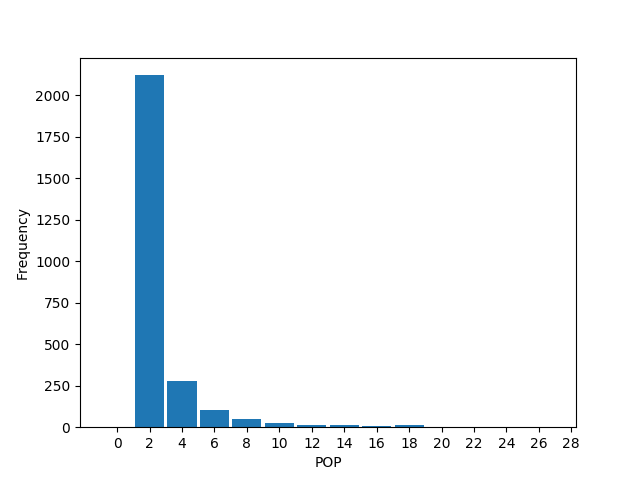

In [143]:
hist_mtr(cl_mtr, 'POP', bins = range(0,30,2))